## 1. Introduction to Support Vector Machines


**Support Vector Machines** (SVMs in short) are machine learning algorithms that are used for classification and regression purposes. SVMs are one of the powerful machine learning algorithms for classification, regression and outlier detection purposes. An SVM classifier builds a model that assigns new data points to one of the given categories. Thus, it can be viewed as a non-probabilistic binary linear classifier.

The original SVM algorithm was developed by Vladimir N Vapnik and Alexey Ya. Chervonenkis in 1963. At that time, the algorithm was in early stages. The only possibility is to draw hyperplanes for linear classifier. In 1992, Bernhard E. Boser, Isabelle M Guyon and Vladimir N Vapnik suggested a way to create non-linear classifiers by applying the kernel trick to maximum-margin hyperplanes. The current standard was proposed by Corinna Cortes and Vapnik in 1993 and published in 1995.

SVMs can be used for linear classification purposes. In addition to performing linear classification, SVMs can efficiently perform a non-linear classification using the **kernel trick**. It enable us to implicitly map the inputs into high dimensional feature spaces.




## 2. Support Vector Machines intuition


Now, we should be familiar with some SVM terminology. 


### Hyperplane

A hyperplane is a decision boundary which separates between given set of data points having different class labels. The SVM classifier separates data points using a hyperplane with the maximum amount of margin. This hyperplane is known as the `maximum margin hyperplane` and the linear classifier it defines is known as the `maximum margin classifier`.


### Support Vectors

Support vectors are the sample data points, which are closest to the hyperplane.  These data points will define the separating line or hyperplane better by calculating margins.


### Margin

A margin is a separation gap between the two lines on the closest data points. It is calculated as the perpendicular distance from the line to support vectors or closest data points. In SVMs, we try to maximize this separation gap so that we get maximum margin.


### SVM Under the hood

In SVMs, our main objective is to select a hyperplane with the maximum possible margin between support vectors in the given dataset. SVM searches for the maximum margin hyperplane in the following 2 step process –


1.	Generate hyperplanes which segregates the classes in the best possible way. There are many hyperplanes that might classify the data. We should look for the best hyperplane that represents the largest separation, or margin, between the two classes.

2.	So, we choose the hyperplane so that distance from it to the support vectors on each side is maximized. If such a hyperplane exists, it is known as the **maximum margin hyperplane** and the linear classifier it defines is known as a **maximum margin classifier**. 


### Problem with dispersed datasets


Sometimes, the sample data points are so dispersed that it is not possible to separate them using a linear hyperplane. 
In such a situation, SVMs uses a `kernel trick` to transform the input space to a higher dimensional space as shown in the diagram below. It uses a mapping function to transform the 2-D input space into the 3-D input space. Now, we can easily segregate the data points using linear separation.



## 3. Kernel trick


In practice, SVM algorithm is implemented using a `kernel`. It uses a technique called the `kernel trick`. In simple words, a `kernel` is just a function that maps the data to a higher dimension where data is separable. A kernel transforms a low-dimensional input data space into a higher dimensional space. So, it converts non-linear separable problems to linear separable problems by adding more dimensions to it. Thus, the kernel trick helps us to build a more accurate classifier. Hence, it is useful in non-linear separation problems.

In the context of SVMs, there are 4 popular kernels – `Linear kernel`, `Polynomial kernel` and `Radial Basis Function (RBF) kernel` (also called Gaussian kernel) and `Sigmoid kernel`. 

## 4. The problem statement


In this problem , I try to classify a Social Network Advertisement data as `purchase` or `Not purchase` from the following features
* User ID
* Gender
* Age
* EstimatedSalary	

User ID purchase items then it goes into positive class otherwise negative class. I implement Support Vector Machines (SVMs) classification algorithm with Python and Scikit-Learn to solve this problem. 



 # 5. Import libraries

I will start off by importing the required Python libraries.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 6.Import dataset

In [35]:
url= 'https://raw.githubusercontent.com/kulkarni62sushil/Data/main/Social_Network_Ads.csv'
datasets=pd.read_csv(url)

In [36]:
# Alternativel
# Importing the datasets

# datasets = pd.read_csv('Social_Network_Ads.csv')

## 7.Exploratory data analysis


Now, I will explore the data to gain insights about the data. 

In [37]:
# view dimensions of dataset

datasets.shape

(400, 5)

We can see that there are 400 instances and 5 feature variables in the data set.

In [38]:
# let's preview the dataset

datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [39]:
# let's find datatypes of features
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


We can see that there are 5 variables in the dataset. 4 are continuous variables and 1 is discrete variable. The discrete variable is `Purchased` variable. It is also called the target variable. There are no missing values here


Now, I will view the column names to check for leading and trailing spaces.

In [40]:
# Alternatively 
# view the column names of the dataframe

col_names = datasets.columns

col_names

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [41]:
# rename column names

datasets.columns = ['User ID', 'Gender', 'Age', 'EstimatedSalary', 'target_class']


In [42]:
# view the renamed column names

datasets.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'target_class'], dtype='object')

In [43]:
# Convert Gender to integer 1 and 0
cleanup_Gender = {"Gender":{"Male": 0, "Female": 1}}

In [44]:
datasets = datasets.replace(cleanup_Gender)
datasets.head()


,User ID,Gender,Age,EstimatedSalary,target_class
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


Our target variable is the `target_class` column. So, I will check its distribution.

In [45]:
# check distribution of target_class column

datasets['target_class'].value_counts()

0    257
1    143
Name: target_class, dtype: int64

In [46]:
# view the percentage distribution of target_class column

datasets['target_class'].value_counts()/np.float(len(datasets))

<ipython-input-46-86deb3ac72b5>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  datasets['target_class'].value_counts()/np.float(len(datasets))


0    0.6425
1    0.3575
Name: target_class, dtype: float64

# 8. Declare feature vector and target variable

In [47]:
X = datasets.drop(['target_class'], axis=1)

y = datasets['target_class']

# 9. Split data into separate training and test set

In [48]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((320, 4), (80, 4))

# 10. Feature Scaling

In [50]:
cols = X_train.columns

In [51]:
cols_train = X_train.columns
cols_train

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary'], dtype='object')

In [52]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [54]:
X_train.describe()

,User ID,Gender,Age,EstimatedSalary
count,3.200000e+02,3.200000e+02,3.200000e+02,3.200000e+02
mean,-1.056516e-14,6.245005e-17,1.179612e-17,2.844947e-17
std,1.001566e+00,1.001566e+00,1.001566e+00,1.001566e+00
min,-1.724943e+00,-1.025320e+00,-1.965480e+00,-1.591382e+00
25%,-8.940298e-01,-1.025320e+00,-7.989508e-01,-7.801636e-01
50%,4.455700e-02,9.753048e-01,-2.126485e-02,-1.240367e-02
75%,8.228962e-01,9.753048e-01,7.564211e-01,5.235797e-01
max,1.760050e+00,9.753048e-01,2.117372e+00,2.319848e+00


## 11. Run SVM with default hyperparameters


Default hyperparameter means C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [55]:
# Fitting the classifier into the Training set

from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [57]:
# make predictions on test set
y_pred=svc.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1])

In [24]:
y_test.array

<PandasArray>
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
 1, 1]
Length: 80, dtype: int64

Compare the results of `y_pred` and `y_test`

In [58]:
# compute and print accuracy score
# import metrics to compute accuracy
from sklearn.metrics import accuracy_score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9375


### Run SVM with rbf kernel and C=100.0


We have seen that there are outliers in our dataset. So, we should increase the value of C as higher C means fewer outliers. 
So, I will run SVM with kernel=`rbf` and C=100.0.

In [59]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9250


We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.

Now, I will further increase the value of C=1000.0 and check accuracy.

### Run SVM with rbf kernel and C=1000.0

In [60]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9000


In this case, we can see that the accuracy had decreased with C=1000.0

## 12. Run SVM with linear kernel


### Run SVM with linear kernel and C=1.0

In [61]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9125


### Run SVM with linear kernel and C=100.0

In [62]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9125


### Run SVM with linear kernel and C=1000.0

In [63]:
# instantiate classifier with linear kernel and C=1000.0
linear_svc1000=SVC(kernel='linear', C=1000.0) 


# fit classifier to training set
linear_svc1000.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc1000.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9000


We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.

## 13.Confusion matrix


A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.

In [64]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[56  2]
 [ 5 17]]

True Positives(TP) =  56

True Negatives(TN) =  17

False Positives(FP) =  2

False Negatives(FN) =  5


In [32]:
import seaborn as sns
%matplotlib inline


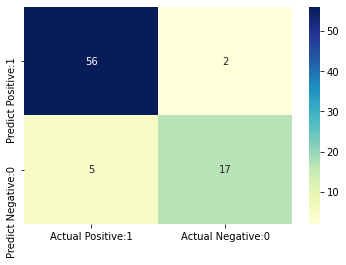

In [65]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')